# Combining Data with Pandas' `merge`

In [6]:
import pandas as pd

## Importing Data

Here you will import the temperature and precipitation climate normals datasets into DataFrames. Calling `.head()` on the DataFrame will give you a 5 row preview of your data, and the `shape` attribute will give you the dimensions of the data in the form `(rows, columns)`. These are great sanity checks to run before doing too much with the data. 

In [8]:
climate_temp = pd.read_csv("../data/climate_temp.csv")
climate_temp.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,0,0,0,-7777,1,2,6,7,10,15
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,0,0,0,-7777,1,2,6,7,10,15
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,0,0,0,-7777,1,2,5,7,10,15
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,0,0,0,-7777,1,2,5,7,10,15
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,0,0,0,-7777,-7777,2,5,7,10,15


In [3]:
climate_temp.shape

(127020, 21)

In [9]:
climate_precip = pd.read_csv("../data/climate_precip.csv")
climate_precip.head()

,STATION,STATION_NAME,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103,-6.66,-666,-66.6,-6.66,-666,-66.6,-6.66,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,...,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105,-6.66,-9999,-9999.0,-6.66,-9999,-9999.0,-6.66,...,3,0,0,0,0,0,0,0,0,0


In [5]:
climate_precip.shape

(151110, 29)

## merge()

In this section, you will learn about `merge()` functionality in Pandas.


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

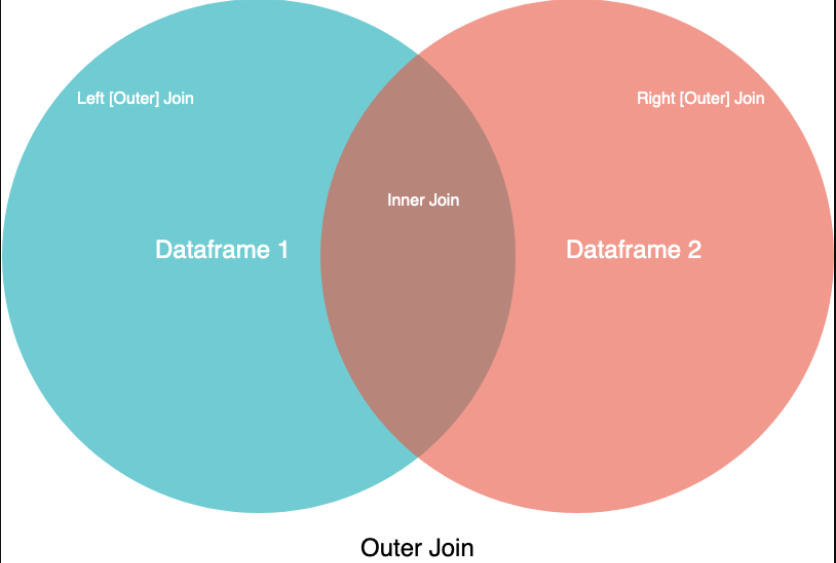

### Inner Join

Here, you will use a plain `merge()` call to do an inner join and learn how this can result in a smaller, more focused dataset.

What if you want to merge both full datasets, but specify which columns to join on? In this case, you will use the `on` parameter:

In [6]:
## Method 1:
inner_merged_total = pd.merge(
    climate_temp, climate_precip, on = "STATION", how = "inner"
)
inner_merged_total

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,3,0,0,0,0,0,0,0,0,0


In [ ]:
## METHOD 2: 

inner_merged_total = pd.merge(
    climate_temp, climate_precip, left_on = 'STATION', right_on = 'STATION', how = "inner" 
)
inner_merged_total

In [7]:
inner_merged_total.shape

(123005, 48)

You can specify a single _key column_ with a string, or multiple key columns with a list, as in the above example. This results in a DataFrame with 123005 rows and 48 columns. 

Why 48 columns instead of 47? Because you specified the keys columns to join on, Pandas doesn't try to merge all mergeable columns. This can result in "duplicate" column names, which may or may not have different values. "Duplicate" is in quotes because the columns will actually have new names, by default they are appended with `_x` and `_y`.

### Outer Join
With the outer join, you will retain rows that don't have matches as well. For this example, you will use the smaller precipitation DataFrame `precip_one_station` with the full `climate_temp` DataFrame and join with `STATION` and `DATE` columns as the key columns. Take a second and think about how many rows you expect the new DataFrame to have.

In [8]:
outer_merged = pd.merge(climate_precip, climate_temp, how = "outer", on = "STATION")
outer_merged.head()

,STATION,STATION_NAME_x,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,...,0.0,0.0,0.0,-7777.0,1.0,2.0,6.0,7.0,10.0,15.0
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,...,0.0,0.0,0.0,-7777.0,1.0,2.0,6.0,7.0,10.0,15.0
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,...,0.0,0.0,0.0,-7777.0,1.0,2.0,5.0,7.0,10.0,15.0
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,...,0.0,0.0,0.0,-7777.0,1.0,2.0,5.0,7.0,10.0,15.0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,...,0.0,0.0,0.0,-7777.0,-7777.0,2.0,5.0,7.0,10.0,15.0


In [9]:
outer_merged.shape

(155125, 48)

If you remember from when you checked the `.shape` attribute of `climate_temp`, you'll see that the number of rows in `outer_merged` matches that. With an outer join, you can expect to have the same number of rows as the larger DataFrame, since none are lost like they are in an inner join. 

### Left Join
Also known as a left outer join. In this join, you will retain rows that don't have matches only on the left (or first) DataFrame to be merged.

In [10]:
left_merged = pd.merge(climate_temp, climate_precip, how = "left", on = "STATION")
left_merged.head()

,STATION,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,3.0,-9999.0,0.0,-9999.0,-9999.0,-9999.0,-9999.0,0.0,-9999.0,-9999.0
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
left_merged.shape

(127020, 48)

Here, you see that the number of rows in the resulting DataFrame matches that of the rows in the `climate_temp` DataFrame. What if we switched the positions of the two DataFrames that we are merging?

### Right Join
This works the same as the left join, however non-matching rows are only retained in the _right_ DataFrame. In the next example, you will recreate the `left_merged` DataFrame but with a right join.

In [12]:
right_merged = pd.merge(climate_precip, climate_temp, how="right", on= "STATION")
right_merged.head()

,STATION,STATION_NAME_x,DATE,DLY-PRCP-25PCTL,DLY-SNWD-25PCTL,DLY-SNOW-25PCTL,DLY-PRCP-50PCTL,DLY-SNWD-50PCTL,DLY-SNOW-50PCTL,DLY-PRCP-75PCTL,...,DLY-CLDD-NORMAL,DLY-CLDD-BASE70,DLY-CLDD-BASE72,DLY-HTDD-BASE40,DLY-HTDD-BASE45,DLY-HTDD-BASE50,DLY-HTDD-BASE55,DLY-HTDD-BASE57,DLY-HTDD-BASE60,DLY-HTDD-NORMAL
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100101,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,...,0,0,0,-7777,1,2,6,7,10,15
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100102,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,...,0,0,0,-7777,1,2,6,7,10,15
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100103,-6.66,-666.0,-66.6,-6.66,-666.0,-66.6,-6.66,...,0,0,0,-7777,1,2,5,7,10,15
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100104,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,...,0,0,0,-7777,1,2,5,7,10,15
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,20100105,-6.66,-9999.0,-9999.0,-6.66,-9999.0,-9999.0,-6.66,...,0,0,0,-7777,-7777,2,5,7,10,15


In [13]:
right_merged.shape

(127020, 48)

Here, you simply flipped the positions of the input DataFrames and specified a right join. When you inspect `right_merged`, you might notice that it's not exactly the same as `left_merged`. The only difference between the two is the order of the columns: the first input's columns will always be the first in the newly formed DataFrame.


If you want to combine dataframes based on index instead of column, mark: 

left_index=True and/or right_index=True,

on=None,

left_on=None, 

right_on=None

In [10]:
inner_merged_total = pd.merge(
    climate_temp, climate_precip, left_index=True, right_index=True, on=None, left_on=None, right_on=None
)
inner_merged_total

,STATION_x,STATION_NAME_x,ELEVATION,LATITUDE,LONGITUDE,DATE_x,DLY-CLDD-BASE45,DLY-CLDD-BASE50,DLY-CLDD-BASE55,DLY-CLDD-BASE57,...,DLY-PRCP-PCTALL-GE100HI,DLY-SNWD-PCTALL-GE001WI,DLY-SNWD-PCTALL-GE010WI,DLY-SNWD-PCTALL-GE003WI,DLY-SNWD-PCTALL-GE005WI,DLY-SNOW-PCTALL-GE001TI,DLY-SNOW-PCTALL-GE010TI,DLY-SNOW-PCTALL-GE100TI,DLY-SNOW-PCTALL-GE030TI,DLY-SNOW-PCTALL-GE050TI
0,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100101,6,2,-7777,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
1,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100102,6,2,1,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
2,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100103,6,2,1,-7777,...,3,-9999,0,-9999,-9999,-9999,-9999,0,-9999,-9999
3,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100104,6,2,1,-7777,...,3,0,0,0,0,0,0,0,0,0
4,GHCND:USC00049099,TWENTYNINE PALMS CA US,602,34.12806,-116.03694,20100105,6,2,1,-7777,...,3,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127015,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101227,4,2,1,-7777,...,15,0,0,0,0,0,0,0,0,0
127016,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101228,4,2,1,-7777,...,15,0,0,0,0,0,0,0,0,0
127017,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101229,4,2,1,-7777,...,16,0,0,0,0,0,0,0,0,0
127018,GHCND:USC00046006,MOUNT WILSON CBS CA US,1740.4,34.2308,-118.0711,20101230,4,2,1,-7777,...,16,0,0,0,0,0,0,0,0,0
